# Lecture 7
_____________


## _Stats review_

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

Folsom annual inflow data

__Summary statistics__, __histogram__, __QQ plot__

In [49]:
annQ = np.loadtxt('data/folsom-annual-flow.csv', delimiter=',', skiprows=1, usecols=[1])
N = len(annQ)

m = np.mean(annQ)
s = np.std(annQ)
g = stats.skew(annQ)

print('Mean = %f' % m)
print('Std. Dev. = %f' % s)
print('Skew Coef. = %f' % g) # no skew function in numpy

Mean = 2729.264858
Std. Dev. = 1462.176198
Skew Coef. = 0.664016


Other keyword arguments: bins, density (for PDF instead of count)

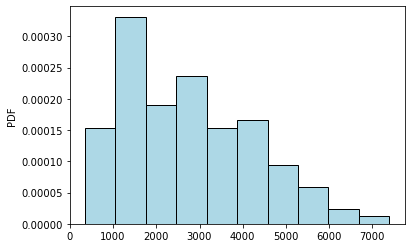

In [57]:
plt.hist(annQ, density=True, color='lightblue', edgecolor='k')
plt.ylabel('PDF')
plt.show()

Plot the fitted pdf on top of the histogram

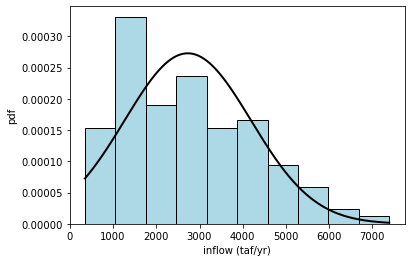

In [58]:
plt.hist(annQ, density=True, color='lightblue', edgecolor='k')

x = np.arange(min(annQ),max(annQ), 10) # points to plot at
pdf = stats.norm.pdf(x, loc=m, scale=s)
plt.plot(x, pdf, color='k', linewidth=2)
plt.xlabel('inflow (taf/yr)')
plt.ylabel('pdf')
plt.show()

Quantile-Quantile (QQ) plot and probability plot correlation coefficient (PPCC)

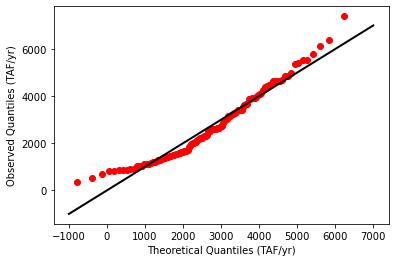

In [60]:
# is this a good fit? We would hope for better - the tails are important 
plt.figure()
quantiles = np.arange(1,N+1)/float(N+1) # quantiles of the fitted distribution, evenly spaced
Zp = stats.norm.ppf(quantiles) # z-values

Qpred = m + s*Zp # predicted/simulated streamflow values
plt.scatter(Qpred, np.sort(annQ), color='red') # scatter plot of predicted vs. observed
plt.plot([-1000,7000],[-1000,7000], color='k', linewidth=2)
plt.xlabel('Theoretical Quantiles (TAF/yr)') # predicted
plt.ylabel('Observed Quantiles (TAF/yr)') # observed data/quantiles
plt.show()

In [61]:
# probability plot correlation coefficient
r,p = stats.pearsonr(Qpred, np.sort(annQ))
print('PPCC = %f' % r)

PPCC = 0.977802


--------

## _Testing distributions_

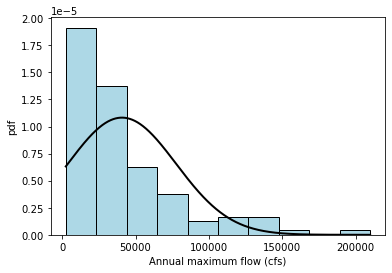

In [62]:
x = np.loadtxt('data/folsom-annual-peak-flow.csv', delimiter=',', skiprows=1, usecols=[1]) # data in cfs
y = np.log(x)
plt.hist(x, density=True, color='lightblue', edgecolor='k')

points = np.arange(min(x),max(x), 10) # points to plot at
pdf = stats.norm.pdf(points, loc=x.mean(), scale=x.std())
plt.plot(points, pdf, color='k', linewidth=2)
plt.xlabel('Annual maximum flow (cfs)')
plt.ylabel('pdf')
plt.show()

Is it normal?

In [64]:
print(stats.kstest(x, 'norm', args=(x.mean(), x.std())))
# reject hypothesis that this data came from normal distribution

KstestResult(statistic=0.1757793915296848, pvalue=0.0013207381429349368)


Is it lognormal?

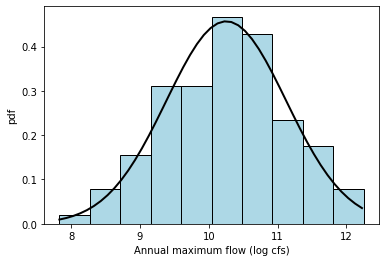

KstestResult(statistic=0.054575669085862144, pvalue=0.8611118047025051)


In [66]:
plt.hist(y, density=True, color='lightblue', edgecolor='k')

points = np.arange(min(y),max(y), 0.1) # points to plot at
pdf = stats.norm.pdf(points, loc=y.mean(), scale=y.std())
plt.plot(points, pdf, color='k', linewidth=2)
plt.xlabel('Annual maximum flow (log cfs)')
plt.ylabel('pdf')
plt.show()

print(stats.kstest(y, 'norm', args=(y.mean(), y.std())))
# much better fit; failed to reject null hypothesis that this data came from a log distribution

-------

## _Folsom flood frequency_

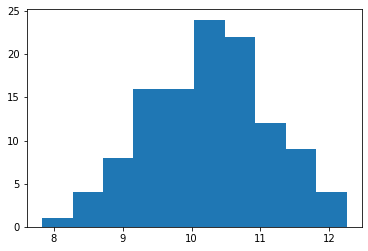

In [71]:
x = np.loadtxt('data/folsom-annual-peak-flow.csv', 
                delimiter=',', 
                skiprows=1, usecols=[1]) # data in cfs
y = np.log(x)
N = len(y)

plt.hist(y)
plt.show()

What is the estimate of the 100-year flood?

Assuming 2-parameter lognormal distribution

In [74]:
T = 100 # return period
m = np.mean(y) # sample mean
s = np.std(y) # sample STD
Zp = stats.norm.ppf(1 - 1/T) # Z-score for 99%
Qt = np.exp(m + Zp*s) # streamflow estimate
print('Lognormal %d-year flood: %f' % (T,Qt)) 

Lognormal 100-year flood: 216342.329753


How different is the LP3 100-year flood estimate?

In [75]:
g = stats.skew(y)
Kp = (2/g)*(1 + g*Zp/6 - g**2/36)**3 - 2/g
Qt = np.exp(m + Kp*s)
print('LP3 %d-year flood: %f' % (T,Qt)) 

LP3 100-year flood: 203106.883243


In [76]:
# confidence intervals for lognormal estimate
halfwidth = stats.norm.ppf(0.975)*np.sqrt((s**2/N)*(1 + Zp**2/2))
lb = np.exp(m + Zp*s - halfwidth) # lower bound
ub = np.exp(m + Zp*s + halfwidth) # upper bound
print('95%% CI: [%f, %f]' % (lb,ub))

95% CI: [159349.484816, 293719.202778]


----